### Oneeba Ahsan
### Task # 3
### Exploratory Data Analysis - Retail
### Level - Beginner

# Import necessary libraries

In [15]:
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

# Read the data file

In [16]:
data = pd.read_csv("./SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [17]:
print(f'Number of NA Values: {data.isna().sum()}\nNumber of Duplicate Rows: {data.duplicated().sum()}')

Number of NA Values: Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
Number of Duplicate Rows: 17


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Check for duplicated values

In [19]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [21]:
data = data.drop('Postal Code', axis=1)

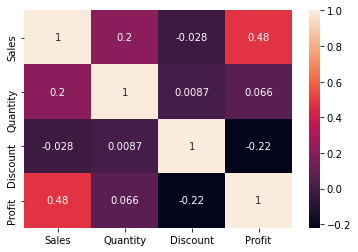

In [24]:
# Correlation of the numerical data
correlation = data.corr()
sns.heatmap(correlation, annot=True)

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

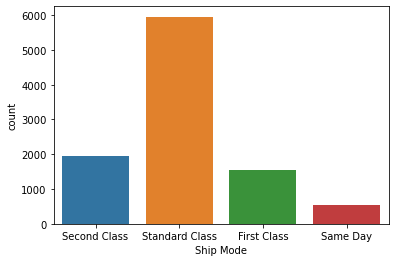

In [26]:
# Plotting count plot of ShipMode to get the most popular shipping method
sns.countplot(x=data['Ship Mode'])
data['Ship Mode'].value_counts()

# Standard Class is the most popular Ship Mode

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

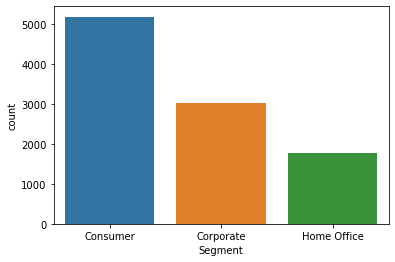

In [27]:
# Plotting count plot of Segment to get the most popular segment
sns.countplot(x=data['Segment'])
data['Segment'].value_counts()

# Consumer Segment is the most popular Segment

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

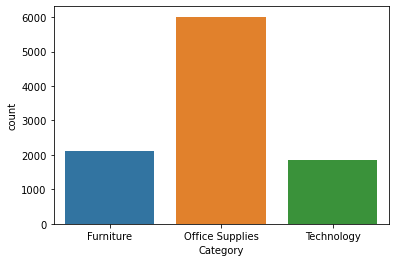

In [28]:
# Plotting count plot of Category to get the most popular Category
sns.countplot(x=data['Category'])
data['Category'].value_counts()

# Office Supplies is the most popular Category

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

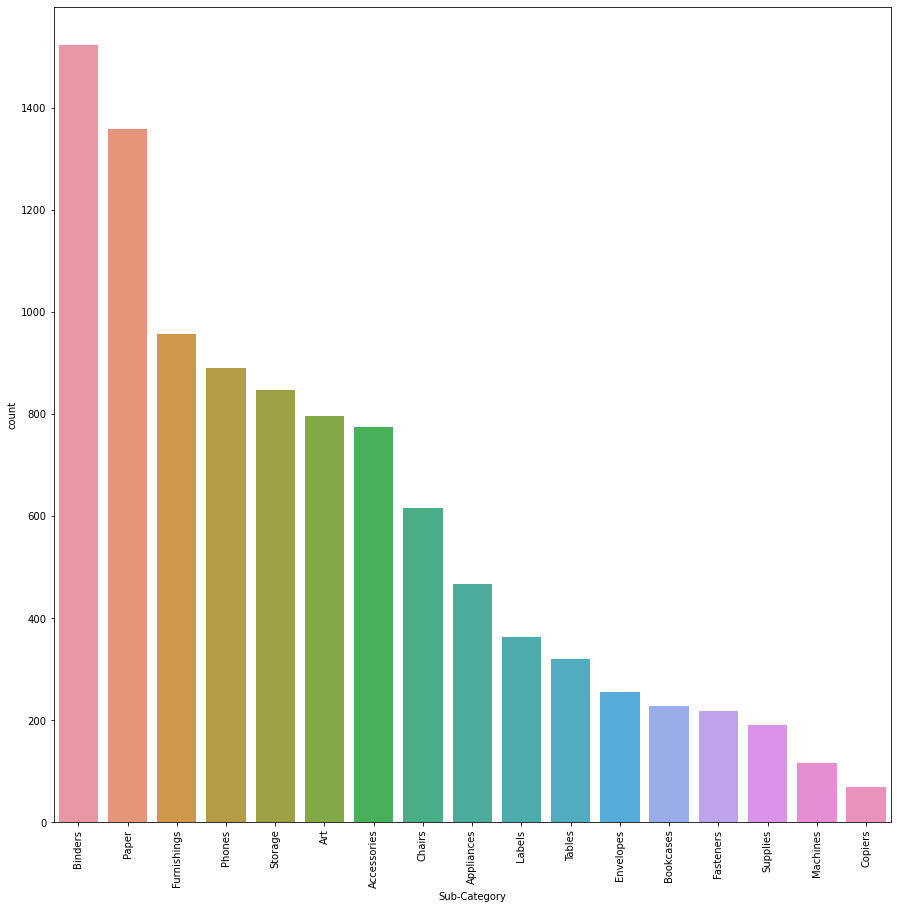

In [43]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(x=data['Sub-Category'], order=data['Sub-Category'].value_counts().index)
data['Sub-Category'].value_counts()

# Binders, Papers and Furnishings are top 3 most popular sub-categories
# Suppliers, Copiers and Machines are top 3 least popular sub-categories

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

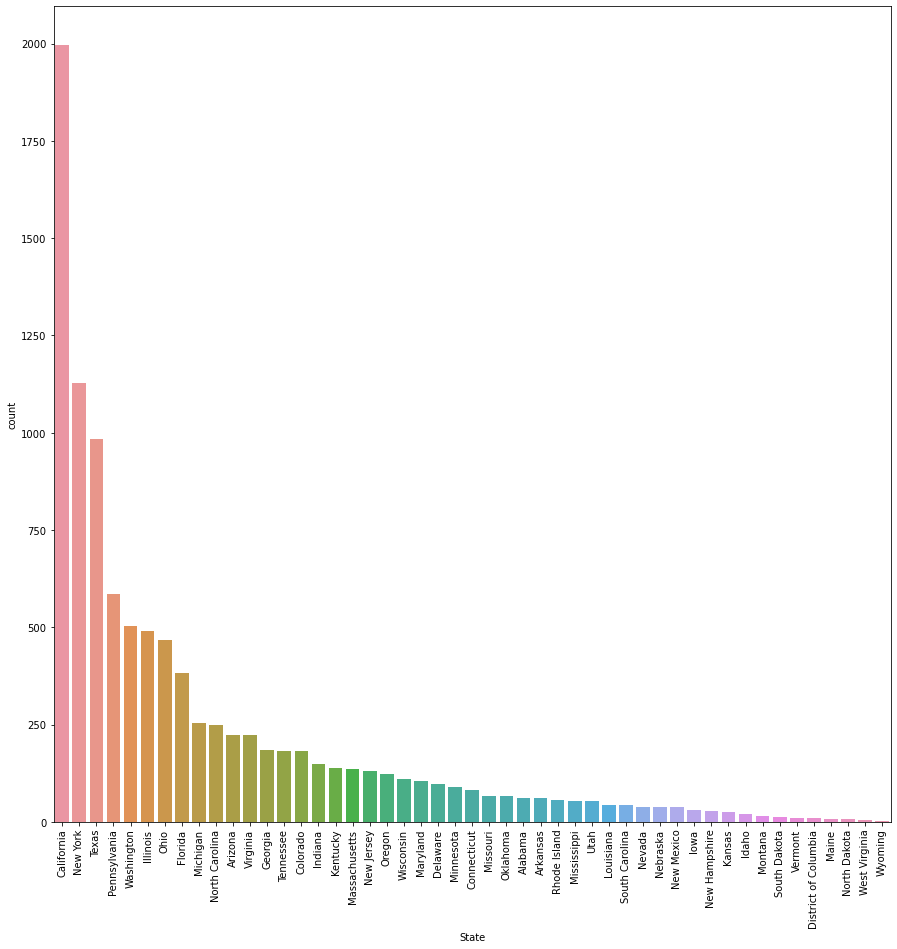

In [44]:
# Plotting count plot of States to get the state which buys the highest amount
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(x=data['State'], order=data['State'].value_counts().index)
data['State'].value_counts()

# California, New York and Texas are top 3 states with most buyers
# Wyoming, West Virginia and North Dakota are top 3 states with least buyers

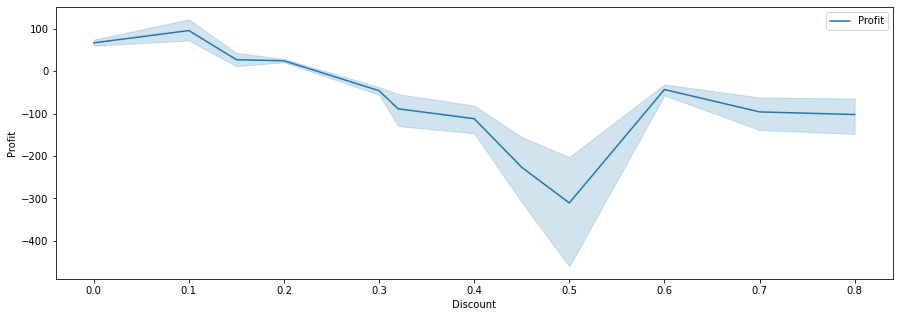

In [49]:
plt.figure(figsize=(15,5))
sns.lineplot(data['Discount'], data['Profit'], label='Profit')

# The profit decreases as discount increases. At 15% discount the profit is 0 and any discount of more than 15% is always resulting in a loss

Text(0, 0.5, 'Sales and Profit')

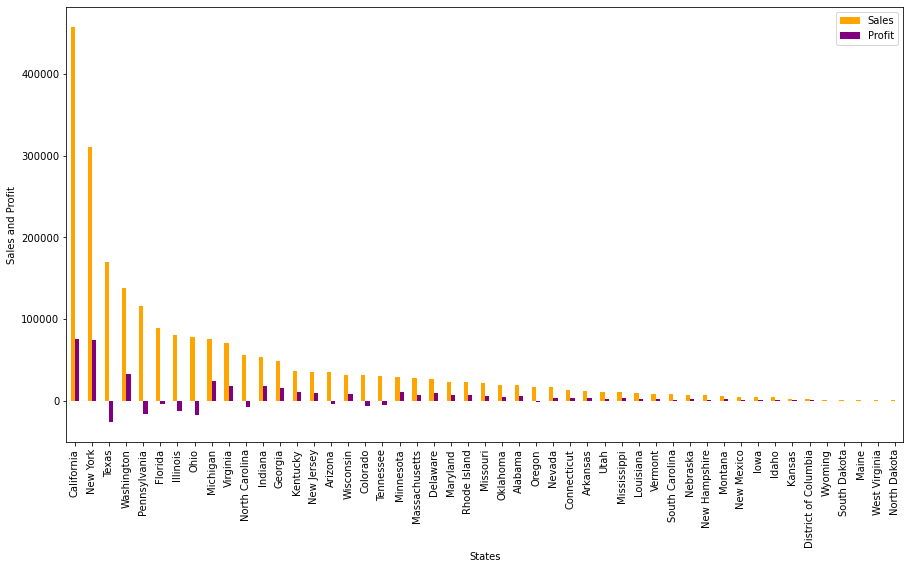

In [70]:
ps = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps.plot.bar(color=['orange','purple'],figsize=(15,8))
plt.xlabel('States')
plt.ylabel('Sales and Profit')

Text(0, 0.5, 'Sales and Profit')

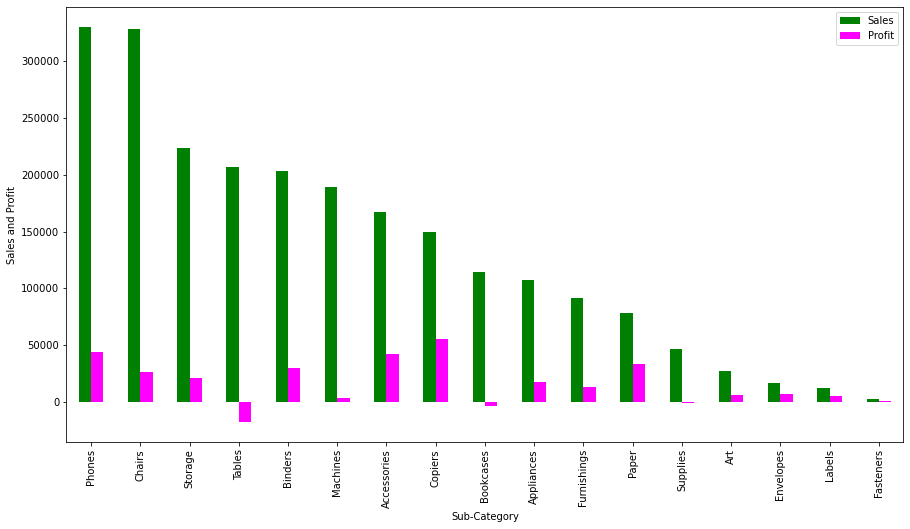

In [71]:
ps = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','magenta'],figsize=(15,8))
plt.xlabel('Sub-Category')
plt.ylabel('Sales and Profit')

## **As a business manager, try to find out the weak areas where you can work to make more profit**
1. Discount should not be more than 10% for marginal profit. 
2. Price of chairs, phones, supplies, tables and bookcases should be set so they can give relatively high profit.
3. Find out the cause of loss in Texas, Pennsylvania, Illinois and Ohio despite the sales.
4. Focus on increasing sales in states with low amount of sales.

## **What all business problems you can derive by exploring the data?**

1. The sales of furniture category is high but the profits are low
2. Discount of more than 15% will always result in a loss.
3. Supplies, Tables and Bookcases have high sales but still result in a loss.
4. Chairs and phones have high sales but relatively low profit.
5. Texas, Pennsylvania, Illinois and Ohio have high sales but still result in a loss.
6. Wyoming, West Virginia, North Dakota, etc have lowest number of sales.
